# Analise dos dados da AV2

In [105]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,8)
plt.rcParams.update({'font.size': 14})

## Dados relacionados a trajetória do alvo

#### Deslocamento do Alvo 1
Abaixo segue os dados relacionados ao deslocamento de um alvo que foram obtidos atraves do código em java. A trajetória tem um tamanho de 500 pixels.
Ao dividir a trajetoria em 400 partes e sortear números que somam 500, tem-se assim uma trajetoria final com velocidade dinamica. A cada atualização de posição do alvo, tem-se um deslocamento diferente.

In [106]:
# Vetor de deslocamentos obtidos da aplicação java. A soma desses deslocamentos é 500, que é o deslocamento total.
# para executar essa parte com dados diretos do txt, tirar as chaves "[...]"
desloc1 = np.loadtxt("alvo1_demo.txt", delimiter=",")
desloc1

array([0., 1., 3., 1., 4., 4., 1., 1., 2., 2., 1., 1., 1., 1., 0., 2., 0.,
       1., 2., 1., 0., 1., 1., 2., 1., 1., 2., 0., 2., 2., 0., 2., 3., 3.,
       0., 1., 0., 0., 1., 0., 0., 2., 1., 1., 0., 2., 1., 2., 1., 2., 0.,
       2., 1., 0., 3., 1., 1., 3., 0., 2., 1., 2., 3., 1., 2., 2., 0., 0.,
       0., 2., 2., 0., 0., 1., 1., 1., 2., 0., 0., 1., 1., 1., 1., 0., 1.,
       3., 2., 2., 0., 1., 2., 4., 2., 0., 1., 1., 0., 0., 0., 0., 2., 0.,
       1., 0., 1., 0., 2., 1., 4., 2., 1., 0., 3., 1., 0., 1., 0., 1., 2.,
       1., 1., 4., 3., 0., 2., 1., 1., 1., 0., 2., 0., 1., 1., 0., 1., 1.,
       0., 3., 0., 2., 0., 2., 1., 0., 0., 0., 2., 0., 4., 0., 1., 0., 1.,
       0., 1., 0., 0., 1., 0., 2., 1., 2., 2., 3., 0., 0., 2., 0., 2., 0.,
       1., 0., 0., 1., 0., 1., 2., 2., 1., 0., 1., 2., 3., 1., 1., 5., 2.,
       4., 3., 4., 0., 3., 2., 1., 0., 1., 0., 3., 1., 1., 2., 0., 2., 1.,
       2., 1., 2., 1., 1., 3., 0., 1., 2., 1., 0., 1., 5., 2., 1., 1., 2.,
       0., 1., 0., 3., 2.

In [107]:
X = np.arange(1, 401, 1)
print("Soma dos deslocamentos: ", sum(desloc1))

desloTotal1 = []
soma = 0
for i in desloc1:
    soma+=i
    desloTotal1.append(soma)

Soma dos deslocamentos:  500.0


#### Melhor visualização das trajetorias

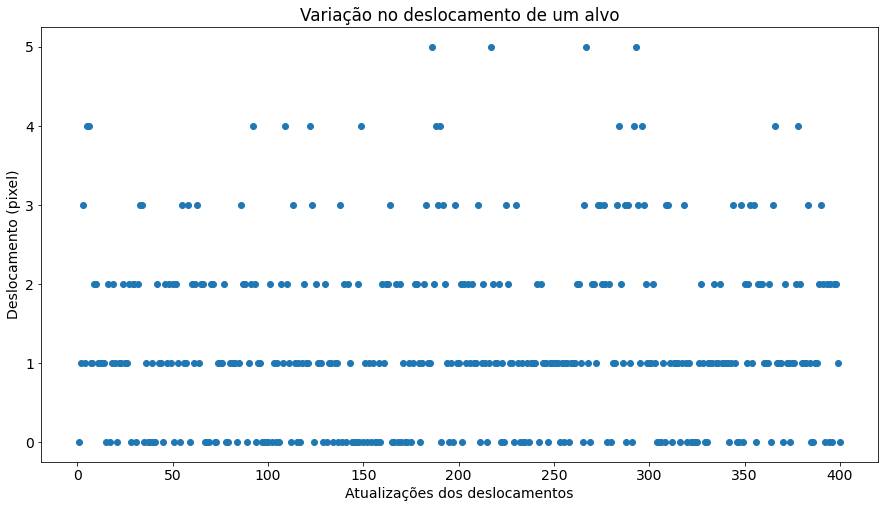

In [108]:
plt.title("Variação no deslocamento de um alvo")
plt.ylabel("Deslocamento (pixel)")
plt.xlabel("Atualizações dos deslocamentos")
plt.scatter(X, desloc1)
plt.show()

#### Histograma mostrando a quantidade de vezes que o alvo faz cada tamanho de deslocamento

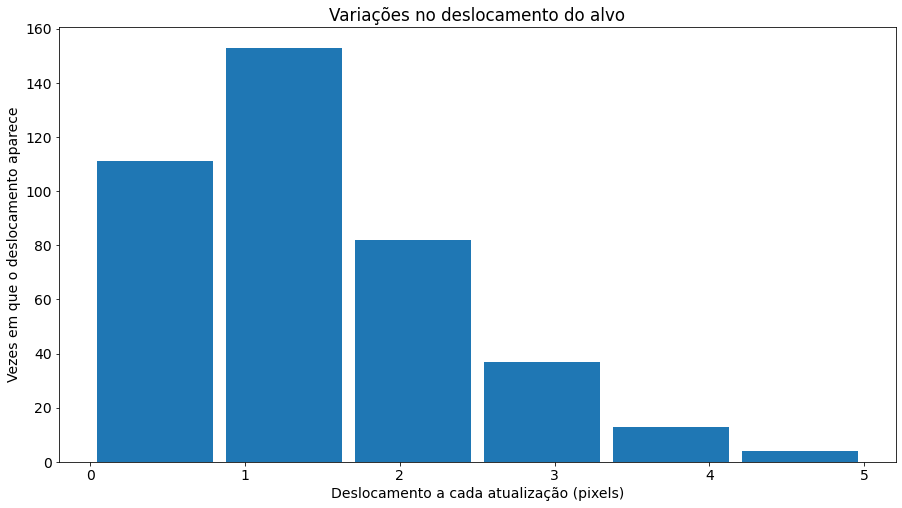

In [109]:
plt.title('Variações no deslocamento do alvo')
plt.xlabel('Deslocamento a cada atualização (pixels)')
plt.ylabel('Vezes em que o deslocamento aparece')
plt.hist(desloc1,  bins=6, rwidth=0.9)
plt.show()

#### O eixo Y mostra o deslocamento do Alvo a cada atualização desse deslocamento em X.

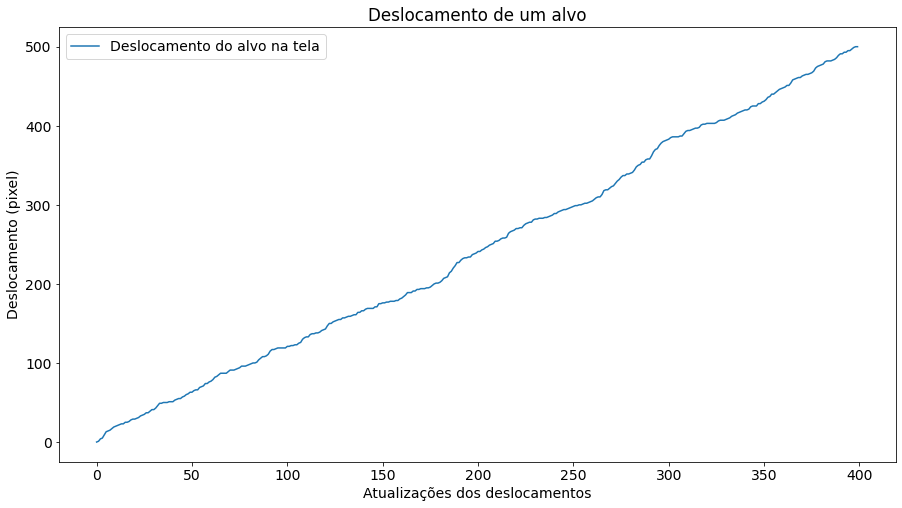

In [110]:
plt.title("Deslocamento de um alvo")
plt.ylabel("Deslocamento (pixel)")
plt.xlabel("Atualizações dos deslocamentos")
plt.plot(desloTotal1, label="Deslocamento do alvo na tela")
plt.legend()
plt.show()

## Dados relacionados ao tiro
abaixo segue um arquivo de dados gerados pela aplicação java. Esse arquivo consiste dos vetores obtidos a cada reconciliação de dados.

[F1, F2, F3, F4, F5, F6, F7, F8, F9, F10, F11]

F1 = Tempo total para o tiro percorrer a trajetória (ms)

F2...Fn = Tempos para percorrer uma trajetória de 10 pixels de tamanho (ms) 

In [111]:
df = pd.read_table("tiro1_demo.txt", delimiter=",",names=["tempo_total", "t_desloc_1", "t_desloc_2", "t_desloc_3",
                                                          "t_desloc_4", "t_desloc_5","t_desloc_6", "t_desloc_7",
                                                          "t_desloc_8", "t_desloc_9", "t_desloc_10", "teta"])
df

,tempo_total,t_desloc_1,t_desloc_2,t_desloc_3,t_desloc_4,t_desloc_5,t_desloc_6,t_desloc_7,t_desloc_8,t_desloc_9,t_desloc_10,teta
0,4000.00000,400.00000,400.00000,400.00000,400.00000,400.00000,400.00000,400.00000,400.00000,400.00000,400.0,0.957713
1,4019.20530,860.60846,394.82462,394.82462,394.82462,394.82462,394.82462,394.82462,394.82462,394.82462,NaN,0.866370
2,2993.40110,211.56055,397.40580,397.40580,397.40580,397.40580,397.40580,397.40580,397.40580,NaN,NaN,0.795608
3,2819.31300,439.46658,396.64105,396.64105,396.64105,396.64105,396.64105,396.64105,NaN,NaN,NaN,0.756650
4,2451.88940,478.69025,394.63986,394.63986,394.63986,394.63986,394.63986,NaN,NaN,NaN,NaN,0.674897
5,2019.39780,448.23022,392.79190,392.79190,392.79190,392.79190,NaN,NaN,NaN,NaN,NaN,0.537772
6,1415.08480,207.44365,402.54706,402.54706,402.54706,NaN,NaN,NaN,NaN,NaN,NaN,0.459953
7,1261.34460,468.18454,396.58002,396.58002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.330423
8,774.05970,372.70460,401.35510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.040568
9,466.84824,466.84824,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.564398


#### Calculo da velocidade de disparo em X e em Y do tiro. Também o calculo do deslocamento para cada atualização do frame (de 30ms)

In [112]:
df["vx"] = 10/df["t_desloc_1"] #  Velocidade do tiro em x
df["vy"] = df["vx"]*df["teta"] #  velocidade do tiro em Y
df["DY"] = df["vy"]*30 # Deslocamento a cada frequencia de atualização em Y
df["DX"] = df["vx"]*30 # Deslocamento a cada frequencia de atualização em X
df

,tempo_total,t_desloc_1,t_desloc_2,t_desloc_3,t_desloc_4,t_desloc_5,t_desloc_6,t_desloc_7,t_desloc_8,t_desloc_9,t_desloc_10,teta,vx,vy,DY,DX
0,4000.00000,400.00000,400.00000,400.00000,400.00000,400.00000,400.00000,400.00000,400.00000,400.00000,400.0,0.957713,0.025000,0.023943,0.718285,0.750000
1,4019.20530,860.60846,394.82462,394.82462,394.82462,394.82462,394.82462,394.82462,394.82462,394.82462,NaN,0.866370,0.011620,0.010067,0.302009,0.348591
2,2993.40110,211.56055,397.40580,397.40580,397.40580,397.40580,397.40580,397.40580,397.40580,NaN,NaN,0.795608,0.047268,0.037607,1.128200,1.418034
3,2819.31300,439.46658,396.64105,396.64105,396.64105,396.64105,396.64105,396.64105,NaN,NaN,NaN,0.756650,0.022755,0.017217,0.516524,0.682646
4,2451.88940,478.69025,394.63986,394.63986,394.63986,394.63986,394.63986,NaN,NaN,NaN,NaN,0.674897,0.020890,0.014099,0.422965,0.626710
5,2019.39780,448.23022,392.79190,392.79190,392.79190,392.79190,NaN,NaN,NaN,NaN,NaN,0.537772,0.022310,0.011998,0.359930,0.669299
6,1415.08480,207.44365,402.54706,402.54706,402.54706,NaN,NaN,NaN,NaN,NaN,NaN,0.459953,0.048206,0.022172,0.665172,1.446176
7,1261.34460,468.18454,396.58002,396.58002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.330423,0.021359,0.007058,0.211726,0.640773
8,774.05970,372.70460,401.35510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.040568,0.026831,0.001088,0.032654,0.804927
9,466.84824,466.84824,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.564398,0.021420,-0.012090,-0.362686,0.642607


#### Velocidade em cada periodo

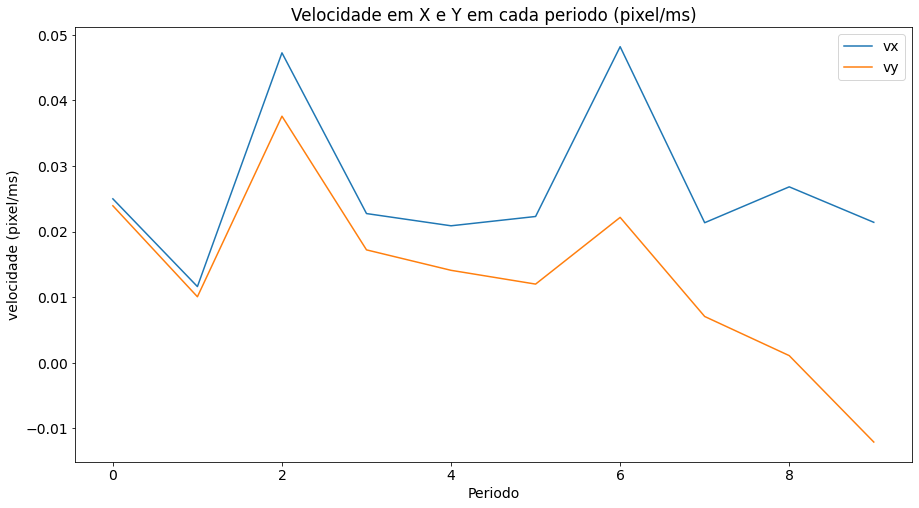

In [113]:
df['vx'].plot(legend="vx")
df['vy'].plot(legend='vy')
plt.legend()
plt.xlabel("Periodo")
plt.ylabel("velocidade (pixel/ms)")
plt.title("Velocidade em X e Y em cada periodo (pixel/ms)")
plt.show()

### Plotando a trajetória

In [114]:
df_traj = df[['tempo_total', 't_desloc_1', 'vx', 'vy']].copy()
X, Y, Periodo = [], [], []
X.append(0)
Y.append(0)
Periodo.append(1)
for date, row in df_traj.T.iteritems():
    for i in range(0, int(row["t_desloc_1"])):
        X.append(row["vx"]+X[-1])
        Y.append(row["vy"]+Y[-1])
        Periodo.append(date+1)
d = {"X": X, "Y": Y, "Periodo": Periodo}
movimentacao = pd.DataFrame(d)

fig = px.line(movimentacao, x="X", y="Y",
              color="Periodo", title='Movimentação para cada Periodo')
fig.show()

In [115]:

X_desl, Y_desl, Periodo_desl, Periodo_desl2 = [], [], [], []
X_desl.append(0)
Y_desl.append(0)
Periodo_desl.append(1)
Periodo_desl2.append(1)

desloc = ["t_desloc_1", "t_desloc_2", "t_desloc_3",
          "t_desloc_4", "t_desloc_5","t_desloc_6", "t_desloc_7",
          "t_desloc_8", "t_desloc_9", "t_desloc_10"]
ultima_posicaoY = [0 ,9.577135, 18.234714, 26.169719, 33.728186, 40.467422, 45.842377,
                   50.432066, 53.734997, 54.139907]
ultima_posicaoX = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]

for date, row in df.T.iteritems():
    X_desl.append(ultima_posicaoX[date])
    Y_desl.append(ultima_posicaoY[date])
    Periodo_desl.append(date+1)
    Periodo_desl2.append(1)
    cont = 1
    for desl in desloc[0:(10-date)]:
        vx = 10/row[desl]
        vy = vx*row['teta']
        for temp in range(0, int(row[desl])):
            X_desl.append(X[-1]+vx)
            Y_desl.append(Y[-1]+vy)
            Periodo_desl.append(date+1)
            Periodo_desl2.append(cont)
        cont+=1

            

data = {"X": X_desl, "Y": Y_desl, "Periodo": Periodo_desl, "Periodos": Periodo_desl2}
movimentacao_desl = pd.DataFrame(data)

fig = px.line(movimentacao_desl, x="X", y="Y",
              color="Periodos", animation_frame="Periodo", title='Movimentação para cada Periodo')
fig.show()
